# Data Cleaning Project With Pandas
This is a mini-project that involves cleaning and preparing a dataset for the purpose of carrying out some analysis on the data.
The data is a CSV file called "*customers_data.csv*" that is available on my local machine, and uploaded to jupyterlab.

## First step: Install required ibraries.

In [6]:
!pip install pandas; numpy; matplotlib; seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------- ------------ 5.5/8.1 MB 33.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 34.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------  2.6/2.6 MB 147.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 8.9 MB/s eta 0:00:00


## Second Step: Import required libraries

In [8]:
# libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")


## Upload our csv file into this workbook and display the table

In [10]:
df = pd.read_csv('customer_data.csv')
df

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Profession,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Healthcare,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,Engineer,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Engineer,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,Lawyer,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Entertainment,Yes,Winter,United States
...,...,...,...,...,...,...,...,...,...,...,...
2000,1996,Female,22,Boots,Footwear,45,Express,Artist,Yes,Summer,United States
2001,1997,Female,22,Boots,Footwear,77,Free Shipping,Doctor,Yes,Summer,Brazil
2002,1998,Male,22,Boots,Footwear,50,Next Day Air,Healthcare,Yes,Summer,United States
2003,1999,Male,22,Boots,Footwear,25,Express,Executive,Yes,Summer,Brazil


## Get file information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           2005 non-null   int64 
 1   Gender               2005 non-null   object
 2   Age                  2005 non-null   int64 
 3   Items Purchased      2005 non-null   object
 4   Category             2005 non-null   object
 5   Purchase Amount      2005 non-null   int64 
 6   Shipping Type        2005 non-null   object
 7   Profession           1970 non-null   object
 8   Subscription Status  2005 non-null   object
 9   Season               1976 non-null   object
 10  Country              2005 non-null   object
dtypes: int64(3), object(8)
memory usage: 172.4+ KB


## Read all columns and check column names
This will help us avoid errors with column names during while operating on our data

In [12]:
df = pd.DataFrame(df)
df.head()
column_list = list(df.columns)
column_list

['CustomerID',
 'Gender',
 'Age',
 'Items Purchased',
 'Category',
 'Purchase Amount',
 'Shipping Type',
 'Profession',
 'Subscription Status',
 'Season',
 'Country']

## Drop irrelevant columns from the table
Considering the nature of analysis to be carried out, the *'Profession'* column has been identified as irrelevant, and so will need to be droped from the dataframe.

In [18]:
df.drop(columns="Profession", inplace=True)
df.head()

KeyError: "['Profession'] not found in axis"

In [22]:
# Check if previous code worked
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           2005 non-null   int64 
 1   Gender               2005 non-null   object
 2   Age                  2005 non-null   int64 
 3   Items Purchased      2005 non-null   object
 4   Category             2005 non-null   object
 5   Purchase Amount      2005 non-null   int64 
 6   Shipping Type        2005 non-null   object
 7   Subscription Status  2005 non-null   object
 8   Season               1976 non-null   object
 9   Country              2005 non-null   object
dtypes: int64(3), object(7)
memory usage: 156.8+ KB


,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States


## Group customers by Age (Age groups)

In [24]:
# Create a dataframe of age groupings
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 55, 65, float('inf')], 
                        labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
                        include_lowest=True)

## Check for and fix all *'NAs'* (or empty cells) and duplicates in the data

In [26]:
# Checking for any N/A values
df.isna().sum()

CustomerID              0
Gender                  0
Age                     0
Items Purchased         0
Category                0
Purchase Amount         0
Shipping Type           0
Subscription Status     0
Season                 29
Country                 0
Age Group               0
dtype: int64

In [28]:
# Dropping all NAs in the 'Season' column and check if it worked

df = df.dropna(subset=['Season'])
df.isna().sum()

CustomerID             0
Gender                 0
Age                    0
Items Purchased        0
Category               0
Purchase Amount        0
Shipping Type          0
Subscription Status    0
Season                 0
Country                0
Age Group              0
dtype: int64

In [29]:
# Check the ID colum for duplicated customer IDs
df.duplicated('CustomerID').sum()

np.int64(5)

In [31]:
# Drop all duplicate customer data and check

df.drop_duplicates(subset="CustomerID", inplace=True)
df.duplicated('CustomerID').sum()

np.int64(0)

## Get description for cleaned data

In [32]:
# Get data description

df.describe()

,CustomerID,Age,Purchase Amount
count,1971.000000,1971.000000,1971.000000
mean,1013.008625,29.548453,52.505835
std,572.332033,13.123082,29.340870
min,1.000000,18.000000,12.000000
25%,522.500000,22.000000,23.000000
50%,1015.000000,22.000000,50.000000
75%,1507.500000,33.000000,77.000000
max,2000.000000,74.000000,100.000000


## Visualizations

Text(0.5, 1.0, 'Customer Spending')

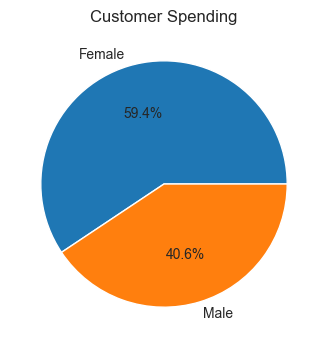

In [36]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Customer Spending')

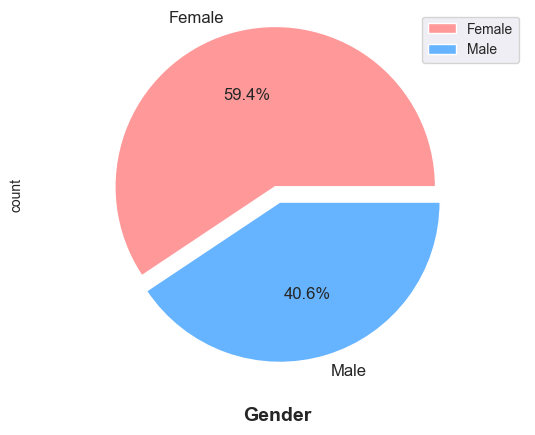

In [37]:
#creating a more colorful pie chart
#libraries for colors for visuals 
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'lightcoral', 'lightskyblue', 'gold']

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%1.1f%%', colors=colors)
plt.xlabel('Gender', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()


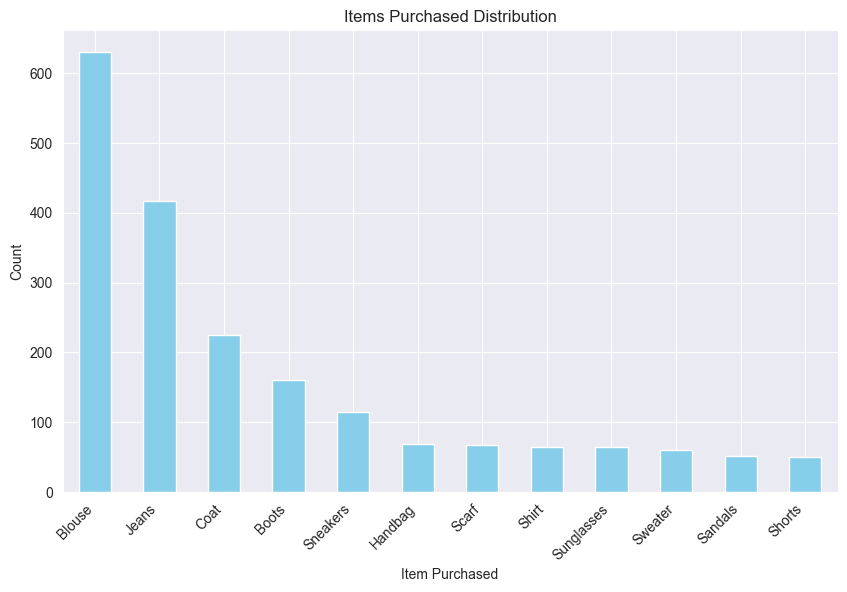

In [38]:
#creating the BAR chart 
item_counts = df['Items Purchased'].value_counts()
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Items Purchased Distribution')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


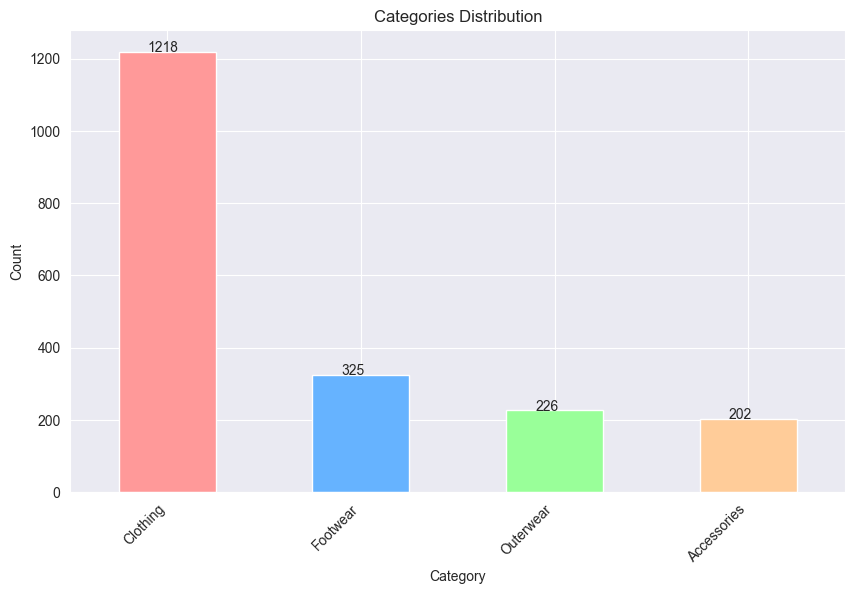

In [39]:
#creating another bar chart
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
bars = category_counts.plot(kind='bar', color=colors)

for bar, count in zip(bars.patches, category_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), fontsize=10)

plt.title('Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


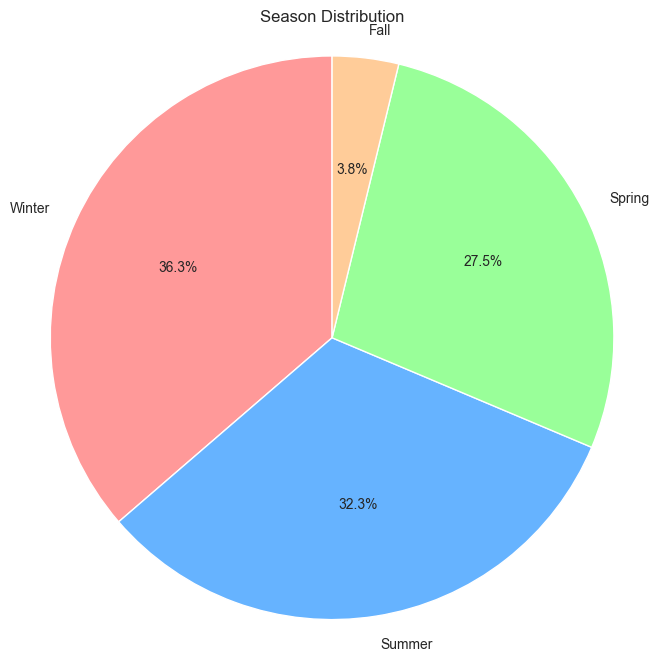

In [41]:
#Creating the pie chart by Season Distribution
season_counts = df['Season'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Season Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()



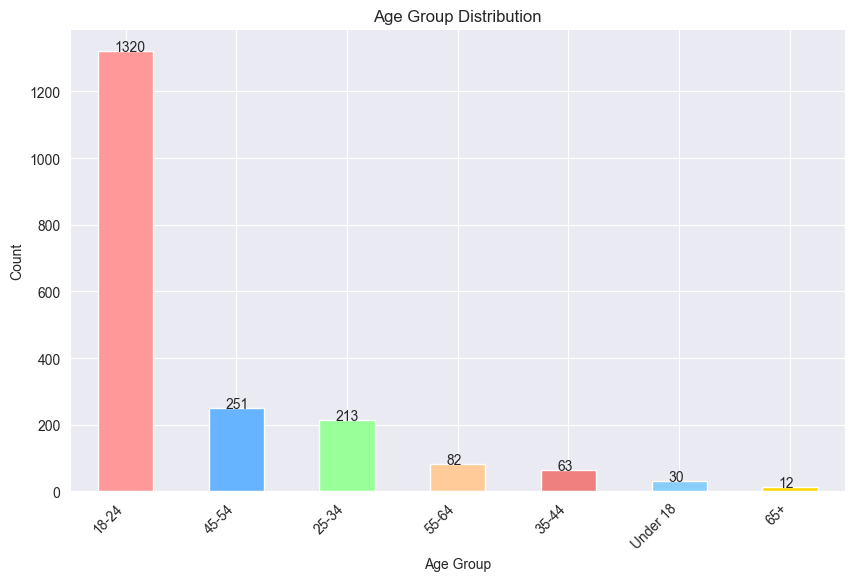

In [42]:
#creating the barchart by Age group distribution
age_group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(10, 6))
bars = age_group_counts.plot(kind='bar', color=colors)

for bar, count in zip(bars.patches, age_group_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), fontsize=10)

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

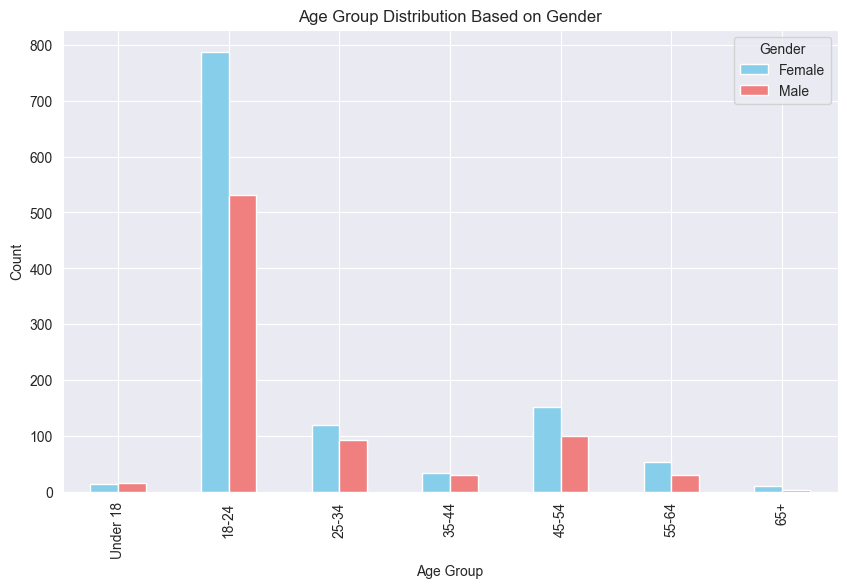

In [43]:
#creating the barchart with Age Group Distribution based on Gender
pivot_df = df.pivot_table(index='Age Group', columns='Gender', aggfunc='size', fill_value=0)

# Plot grouped bar chart
ax = pivot_df.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(10, 6))

ax.set_title('Age Group Distribution Based on Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(title='Gender')

plt.show()


## Credit

**Credit**
I coded along with [Data Geek on Youtube]('https://www.youtube.com/watch?v=cWf08xuSqdU')